# Practica 1
## Regresión Lineal

### Regresion lineal con 1 variable

En esta primera parte de la practica aplicaremos el metodo de regresion lineal sobre los datos de un fichero para calcular, a traves del metodo del gradiente, la recta que mas se asemeja a los datos de entrenamiento.

## IMPORTS

In [30]:
import numpy as np
from pandas.io.parsers import read_csv 
import math as mt
import matplotlib.pyplot as plt

In [38]:
# Funcion que carga el fichero csv especificado y lo devuelve en un array de numpy
def carga_csv(file_name):
    valores = read_csv(file_name, header = None).values
    # suponemos que siempre trabajaremos con float     
    return valores.astype(float)

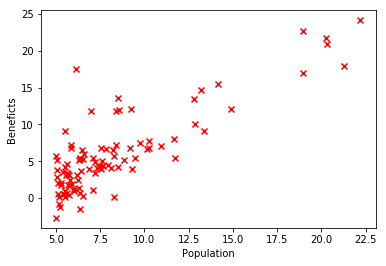

In [58]:
datos = carga_csv('ex1data1.csv')

#print(datos)

X = datos[:, :-1]
np.shape(X)         # (97, 1)     
Y = datos[:, -1]
np.shape(Y)         # (97,)

vX = datos[:, 0]
vY = datos[:, 1]
plt.scatter(vX, vY, marker = 'x', c='r')

plt.xlabel('Population')
plt.ylabel('Beneficts')

m = np.shape(X)[0]
n = np.shape(X)[1]

# Añadimos una columna de 1's a la X
X = np.hstack([np.ones([m, 1]), X])

alpha = 0.01
theta = np.array[0, 0]

def h(x, Theta):
    return np.dot(x, Theta)

def coste(X, Y, Theta):
    H = np.dot(X, Theta)
    Aux = (H - Y) ** 2
    return Aux.sum() / (2 * len(X))

def descenso_gradiente(x, y, alpha, times):
    for i in range(times):
        H = h(x, theta)
        theta[0] = theta[0] - alpha*np.sum(H-h)/times
    
    




#Thetas, costes = descenso_gradiente(X, Y, alpha, 1500)
